In [59]:
%run /content/drive/MyDrive/Colab\ Notebooks/5_MLP_Dataset.ipynb
%run /content/drive/MyDrive/Colab\ Notebooks/6_AdamModel.ipynb

In [60]:
%run /content/drive/MyDrive/Colab\ Notebooks/mathutil.ipynb

In [61]:
import pickle

class MnistDataset(Dataset):
  def __init__(self):
    super(MnistDataset, self).__init__('Mnist', 'select')
    with open('/content/drive/MyDrive/ml-data/mnist_784.pkl', 'rb') as input:
      mnist = pickle.load(input)
    X, y = mnist.data, mnist.target
    xs = np.array(X, np.float32)
    ys = onehot(y, 10)
    self.image_shape = [28,28]
    self.shuffle_data(xs, ys)

In [62]:
def mnist_visualize(self, xs, estimates, answers):
  draw_images_horz(xs, self.image_shape)
  show_select_results(estimates, answers, np.arange(0, 10), 8)

MnistDataset.visualize = mnist_visualize

In [63]:
mnist = MnistDataset()

In [64]:
# END OF MAKING DATASET

In [65]:
model = AdamModel('mnist_model', mnist, [100, 50,])

Model mnist_model train started:
Epoch 5: cost=0.069, accuracy=0.983/1.000 (112/112 secs)
Epoch 10: cost=0.068, accuracy=0.984/0.950 (109/221 secs)
Epoch 15: cost=0.069, accuracy=0.985/0.980 (109/330 secs)
Epoch 20: cost=0.066, accuracy=0.986/0.950 (110/440 secs)
Model mnist_model train ended in 440 secs:
Model mnist_model test report: accuracy=0.964, (1 secs)

Model mnist_model Visualization


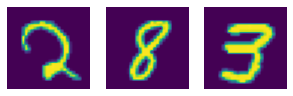

추정확률 분포 [ 0, 0,100, 0, 0, 0, 0, 0,...] => 추정 2 : 정답 2 => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 8 : 정답 8 => O
추정확률 분포 [ 0, 0, 0,100, 0, 0, 0, 0,...] => 추정 3 : 정답 3 => O


In [68]:
model.use_adam = True
model.exec_all(epoch_count=20, batch_size=20, report=5,learning_rate=0.001)